# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import functools
from scipy.stats import linregress
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results ,how='outer',on="Mouse ID")

In [17]:
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice.
mice_id=combined_df['Mouse ID'].nunique()
print(f"There are {mice_id} unique mice IDs.")

There are 249 unique mice IDs.


In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id=combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df=combined_df.loc[combined_df['Mouse ID']==dup_id[0]]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_id)==False]

In [21]:
# Checking the number of mice in the clean DataFrame.
mice_id=clean_df['Mouse ID'].nunique()
print(f"Now there are {len(clean_df)} cases with {mice_id} unique mice IDs.")

Now there are 1880 cases with 248 unique mice IDs.


## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_df=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_df=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_df=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_df=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_df=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table_1=functools.reduce(lambda  left,right: pd.merge(left,right,left_index=True,right_index=True), [mean_df,median_df,variance_df,std_df,sem_df])
summary_table_1.columns=['T_mean','T_median','T_var','T_std','T_sem']
summary_table_1

,T_mean,T_median,T_var,T_std,T_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_2= clean_df.groupby('Drug Regimen').agg(T_mean=('Tumor Volume (mm3)','mean'),
                                                        T_median=('Tumor Volume (mm3)','median'),                   
                                                        T_var=('Tumor Volume (mm3)','var'),
                                                        T_std=('Tumor Volume (mm3)','std'),
                                                        T_sem=('Tumor Volume (mm3)','sem'))
summary_table_2

,T_mean,T_median,T_var,T_std,T_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

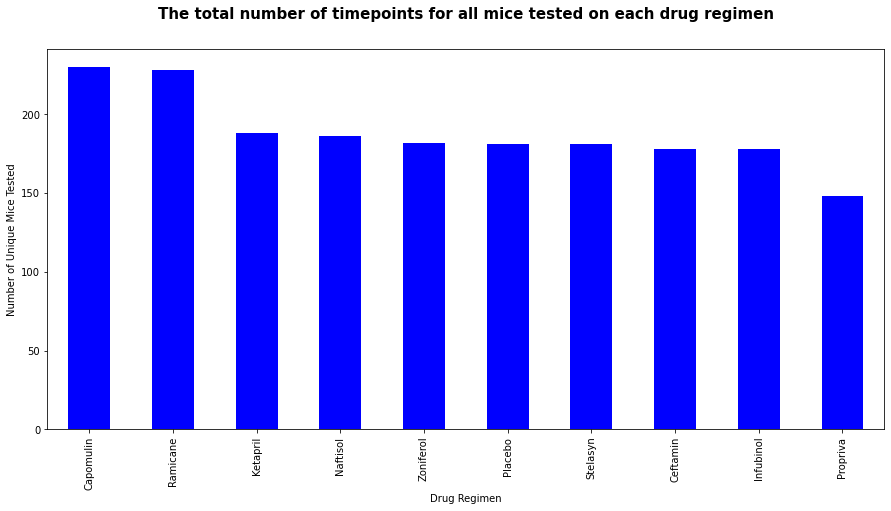

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
treatment_df=clean_df.groupby('Drug Regimen').count()['Timepoint'].sort_values(ascending=False)

plt.figure(figsize=(15,7))

treatment_df.plot(kind='bar',facecolor='blue')
plt.title('The total number of timepoints for all mice tested on each drug regimen',fontsize= 15,pad=30,fontweight="bold")
plt.ylabel('Number of Unique Mice Tested')
#plt.savefig('images/bar_plot_pandas.png') 
plt.show()

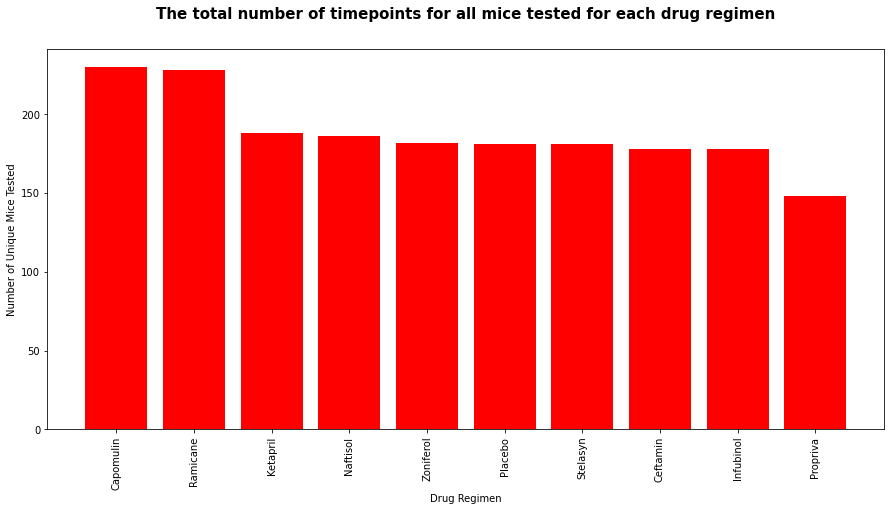

In [29]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using pandas.
plt.figure(figsize=(15,7))
plt.bar(treatment_df.index,treatment_df,facecolor='red')
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.title('The total number of timepoints for all mice tested for each drug regimen',fontsize= 15,pad=30,fontweight="bold")
#plt.savefig('images/bar_matplot.png') 
plt.show()

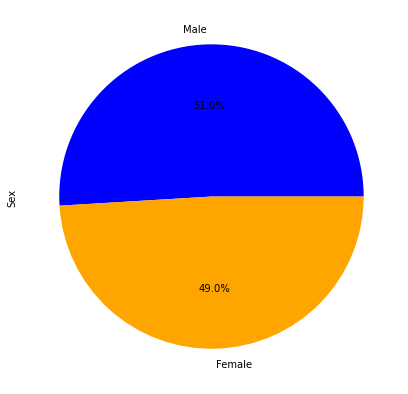

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(15,7))
clean_df['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%",colors=["blue","orange"])
#plt.savefig('images/pie_pandas_plot.png') 
plt.show()

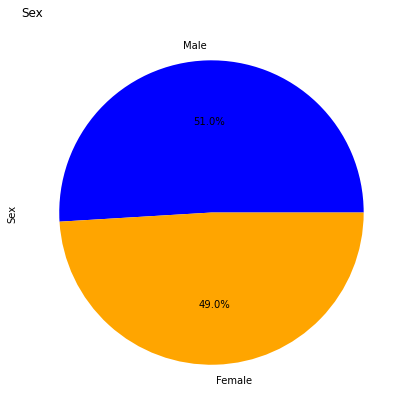

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df=clean_df['Sex'].value_counts()
plt.figure(figsize=(15,7))
plt.pie(sex_df, labels=sex_df.index, autopct="%1.1f%%", colors=["blue","orange"]);
plt.title('Sex',loc='left')
plt.ylabel('Sex')

#plt.savefig('images/pie_matplot.png') 
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint':'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp_merged_df = pd.merge(clean_df, max_timepoint_df, on='Mouse ID')
max_tp_merged_df.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1875     z969     Naftisol  Male           9          30         25   
1876     z969     Naftisol  Male           9          30         30   
1877     z969     Naftisol  Male           9          30         35   
1878     z969     Naftisol  Male           9          30         40   
1879     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  Max Timepoint  
0              45.000000                 0             45

In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_vols = []

for drug in treatment_list:
    # Dataframe of matching drugs in Drug Regimen via loc
    drug_df = max_tp_merged_df.loc[MaxTP_df['Drug Regimen'] == drug]
    # Dataframe adding max timepoint lines via loc
    max_tp_drug_df = drug_df.loc[max_tp_merged_df['Timepoint'] == max_tp_merged_df['Max Timepoint']]
    # Series of Tumor values from dataframe
    values = max_tp_drug_df['Tumor Volume (mm3)']
    
     # add subset 
    treatment_vols.append(values)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerquart = quartiles[.25]
    upperquart = quartiles[.75]
    iqr = upperquart-lowerquart
    print(f'IQR for the tumor volume for {drug}: {iqr}')
    
    # Determine upper and lower bounds
    lower_bound = lowerquart - (1.5*iqr)
    upper_bound = upperquart + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
          
    # Determine outliers
    outlier_count = (values.loc[(max_tp_drug_df['Tumor Volume (mm3)'] >= upper_bound) | 
                  
                                (max_tp_drug_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'The number of {drug} outliers: {outlier_count}\n')
    

IQR for the tumor volume for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
The number of Capomulin outliers: 0

IQR for the tumor volume for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
The number of Ramicane outliers: 0

IQR for the tumor volume for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
The number of Infubinol outliers: 1

IQR for the tumor volume for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
The number of Ceftamin outliers: 0



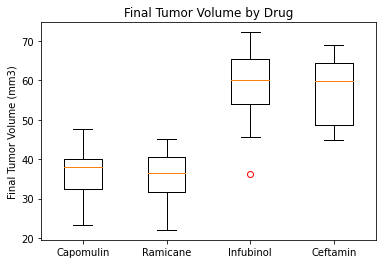

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(treatment_vols, flierprops=dict(markeredgecolor='red'))

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

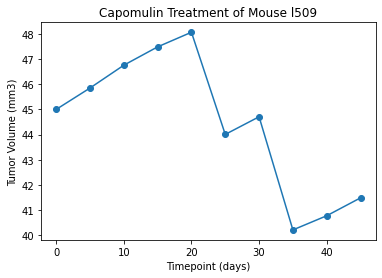

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_tp = clean_df.loc[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse_tp['Timepoint'], mouse_tp['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

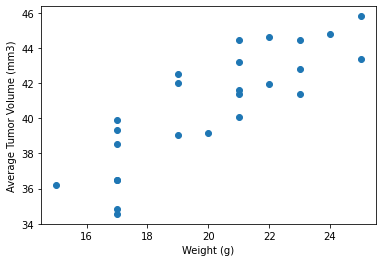

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

avg_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Vol'})

avg_volume_df = pd.merge(capomulin_df, avg_volume_df, on='Mouse ID')
unique_df = avg_volume_df[['Weight (g)', 'Avg Tumor Vol']].drop_duplicates()

x_axis = unique_df['Weight (g)']
y_axis = unique_df['Avg Tumor Vol']
plt.scatter(x_axis, y_axis)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show

## Correlation and Regression

 The correlation between mouse weight and the average tumor volume is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

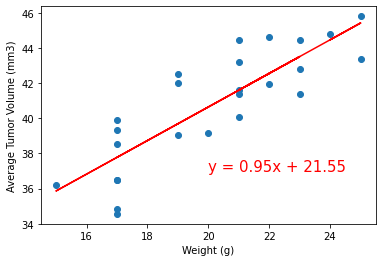

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

r = st.pearsonr(x_axis, y_axis)
print(f" The correlation between mouse weight and the average tumor volume is {round(r[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show